In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementation

In [2]:
class LinearRegression:
    '''
    X: array of shape (n_samples, n_features)
    Y: array of shape (n_samples,)
    '''
    def __init__(self,X,Y):
        one = np.ones((X.shape[0],1))
        X = np.append(one, X, axis=1)
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.theta = np.random.randn(X.shape[1])
    
    def Costfunction(self):
        est = np.matmul(self.X, self.theta)
        cost = (1/2) * (1/self.n) * np.sum((self.Y-est)**2)
        self.cost = cost
        return self.cost
    
    def GradientDescent(self, stop_val, max_iter, step):
        self.cost_history = self.Costfunction()
        #self.theta_history = self.theta.reshape((1,self.p))
        self.theta_history = [self.theta]
        for i in range(1,max_iter):
            est = np.matmul(self.X, self.theta)
            resi = est - self.Y
            self.theta = self.theta - (step/self.n) * (self.X.T.dot(resi))
            L = self.Costfunction()
            self.cost_history = np.append(self.cost_history, L)
            #self.theta_history = np.append(self.theta_history, self.theta.reshape((1,self.p)), axis=0)
            self.theta_history.append(self.theta)
            if np.abs(self.cost_history[i]-self.cost_history[i-1]) < stop_val:
                break
        return self.theta, self.theta_history, self.cost_history
    
    def predict(self, X_test):
        one = np.ones((X_test.shape[0],1))
        X_test = np.append(one, X_test, axis=1)
        self.pred = np.matmul(X_test, self.theta)
        return self.pred
    
    def predict_NormalEquation(self, X_test):
        one = np.ones((X_test.shape[0],1))
        X_test = np.append(one, X_test, axis=1)
        inv = np.linalg.inv(np.matmul(self.X.T, self.X))
        self.coef = np.matmul(np.matmul(inv, self.X.T), self.Y)
        self.pred_normalequ = np.matmul(X_test, self.coef)
        return self.coef, self.pred_normalequ        

### Evaluation

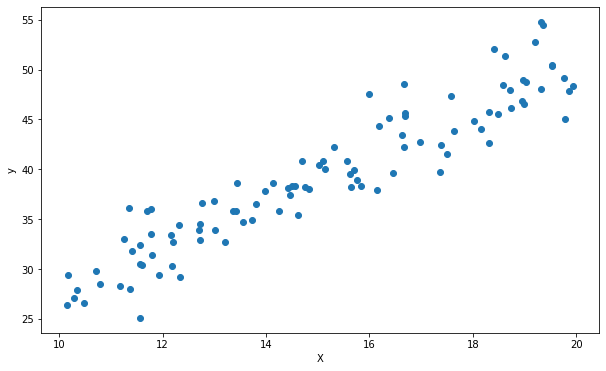

In [3]:
# generate a sample dataset
np.random.seed(2020)
X = np.random.uniform(10,20,size=100)
y = 5.56 + 2.23 * X + np.random.randn(100)*2.5
X = X.reshape((len(X),1))
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Use gradient descent to get the coefficients

In [4]:
lm = LinearRegression(X,y)
theta, thetas, cost = lm.GradientDescent(stop_val=1e-10, max_iter=100000, step=0.005)
pred = lm.predict(X)
MSE = np.mean((pred-y)**2)
print("The estimated coefficients are {}".format(theta))
print("The MSE is {}".format(MSE))

The estimated coefficients are [4.60182289 2.30401478]
The MSE is 6.139572011902848


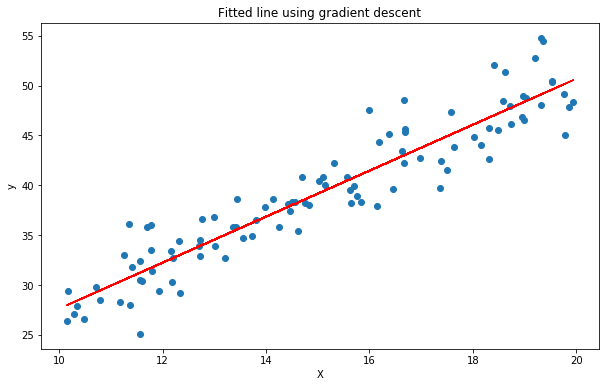

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, pred, 'r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted line using gradient descent')
plt.show()

###  Use normal equation to get the parameters

In [6]:
lm1 = LinearRegression(X,y)
theta1, pred1 = lm1.predict_NormalEquation(X)
MSE1 = np.mean((pred1-y)**2)
print("The estimated coefficients are {}".format(theta1))
print("The MSE is {}".format(MSE1))

The estimated coefficients are [4.60574253 2.30376388]
The MSE is 6.139571456573517


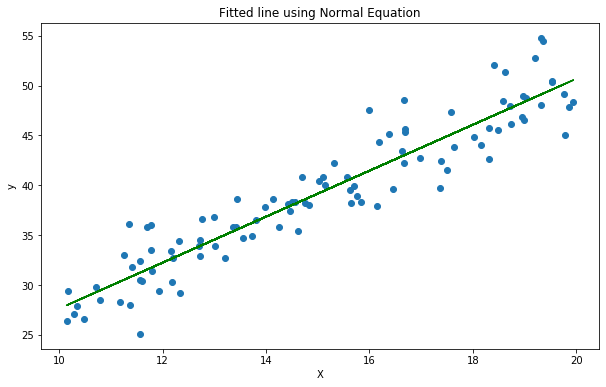

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, pred1, 'green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted line using Normal Equation')
plt.show()

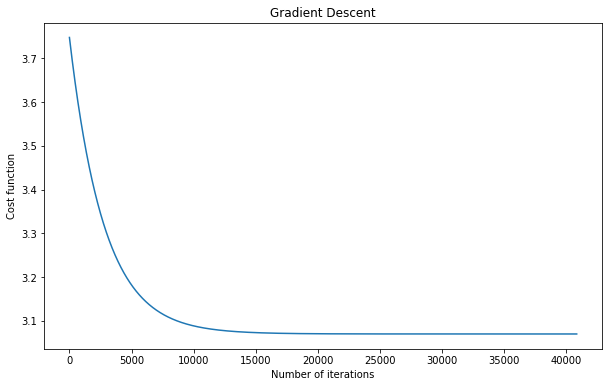

In [8]:
x = [i for i in range(len(cost)-100)]
plt.figure(figsize=(10,6))
plt.plot(x, cost[100:])
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Gradient Descent')
plt.show()

### Compare with sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm2 = LinearRegression()
lm2.fit(X,y)
theta2 = np.append(lm2.intercept_, lm2.coef_)
pred2 = lm2.predict(X)
MSE2 = np.mean((pred2-y)**2)
print("The estimated coefficients are {}".format(theta2))
print("The MSE is {}".format(MSE2))

The estimated coefficients are [4.60574253 2.30376388]
The MSE is 6.1395714565735195


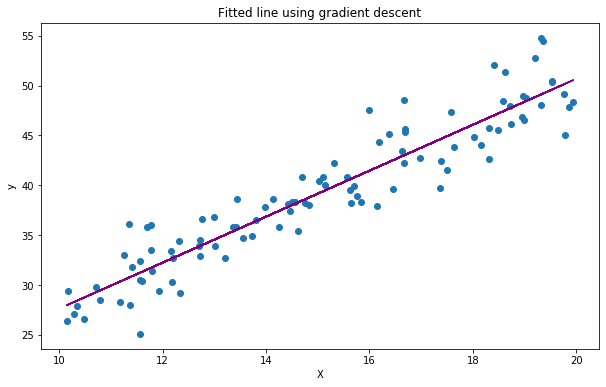

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X, pred2, 'purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted line using gradient descent')
plt.show()